# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [14]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_125222/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

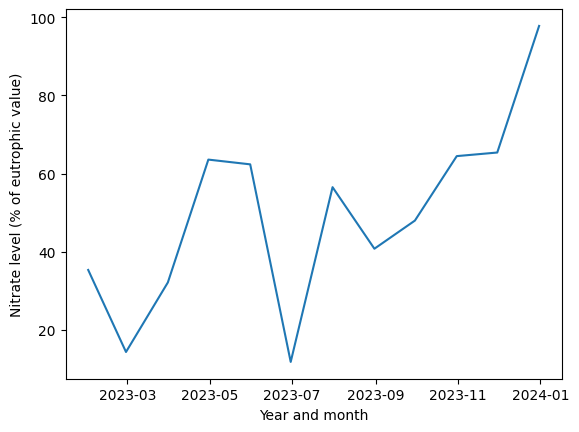

In [15]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_125222/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

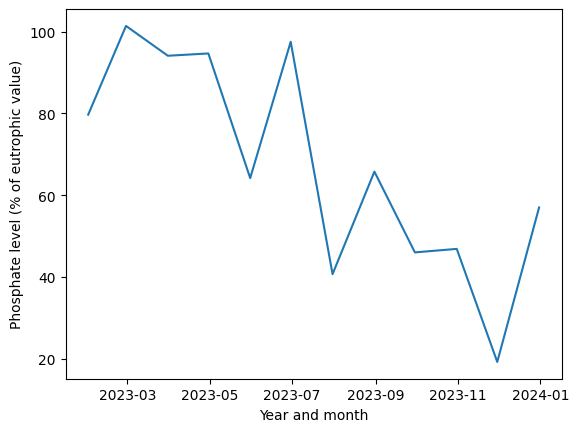

In [16]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

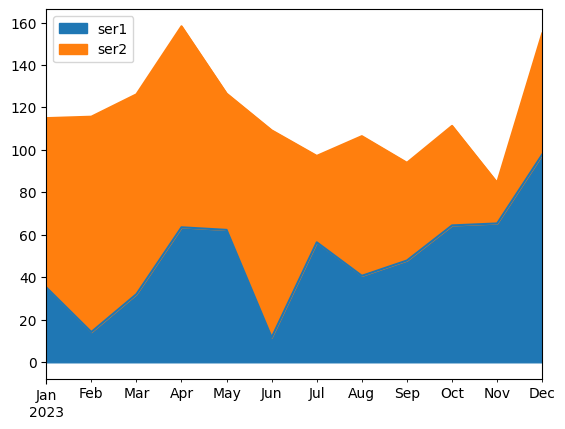

In [17]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

This area plot displays a clear ratio between the nitrate and phosphate levels over time; by looking at the graph, it becomes obvious how the levels compare to each other each month (and over the year) and can allow for easier analysis/trend identification. I would ensure this graph has a title, lables for the x and y axis, and an updated legend to ensure there is more context and clarity for analysis. Although the area plot is a better visualization tool than the line graphs, there are some cons to using it. Because the graphs are stacked, sometimes the finer details are hard to spot. We can see the overall general trend with the area plot, but getting an exact numeric difference between the two levels is harder. 

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [18]:
import pandas as pd
df = pd.read_csv('video_review.csv')

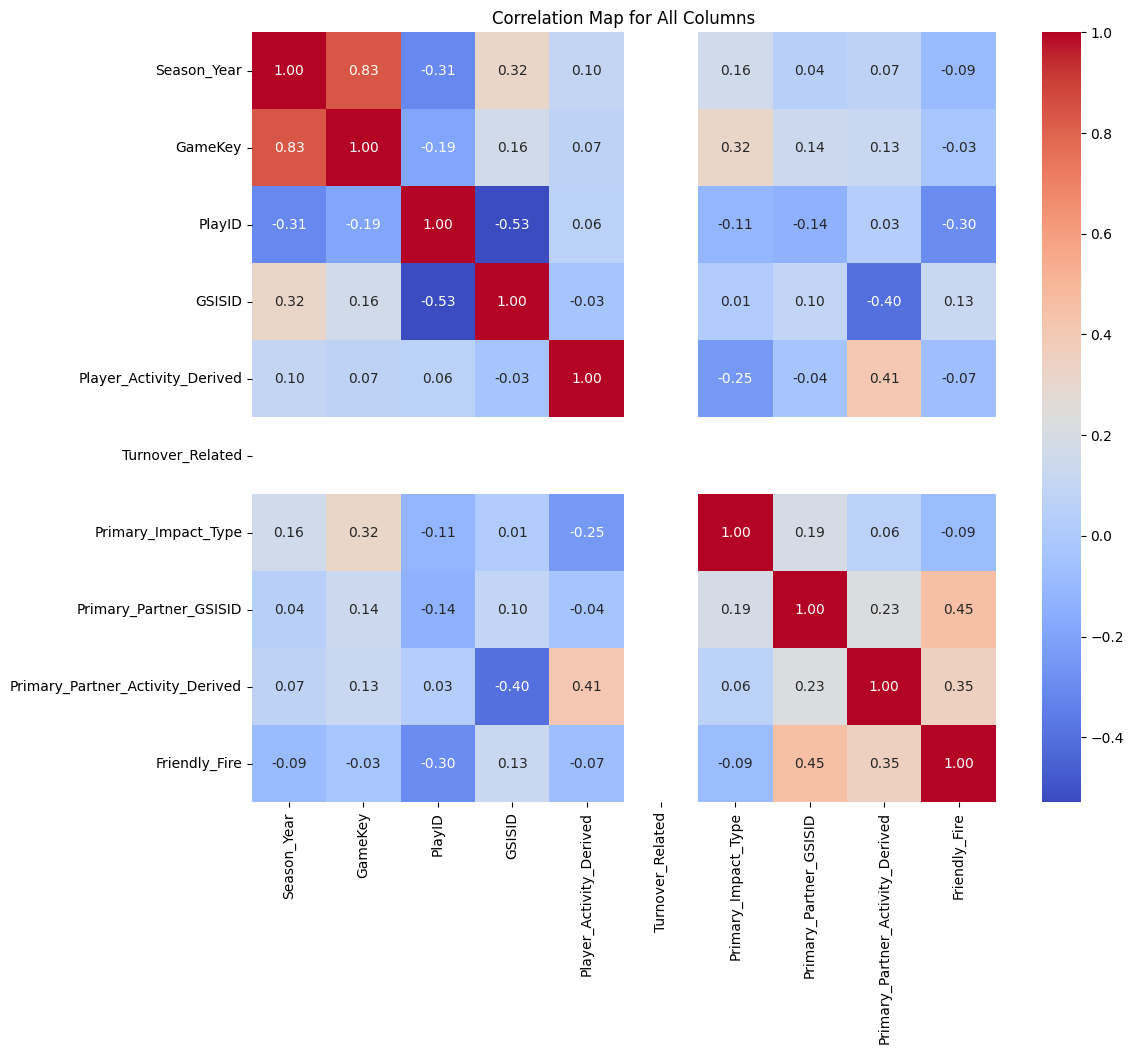

In [19]:
# Correlation 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for column in df.columns:
    if df[column].dtype == 'object':  
        df[column] = df[column].astype('category').cat.codes  

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title('Correlation Map for All Columns')
plt.show()



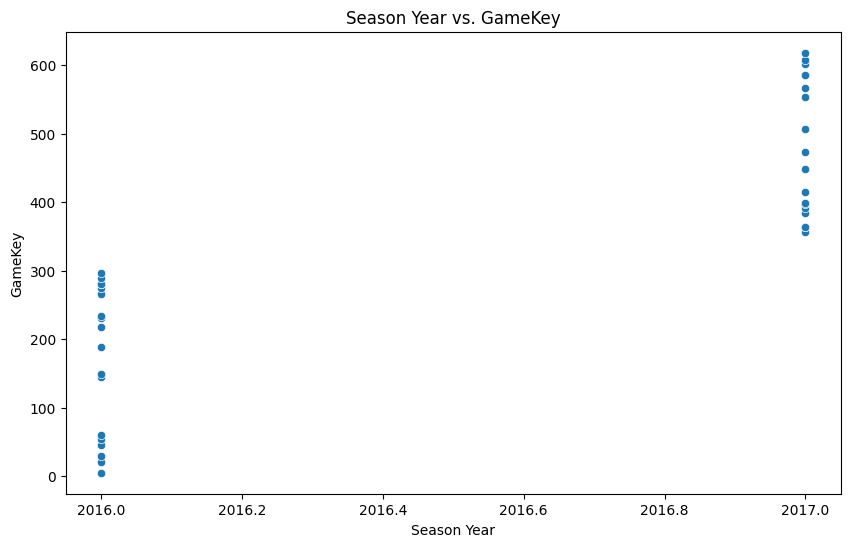

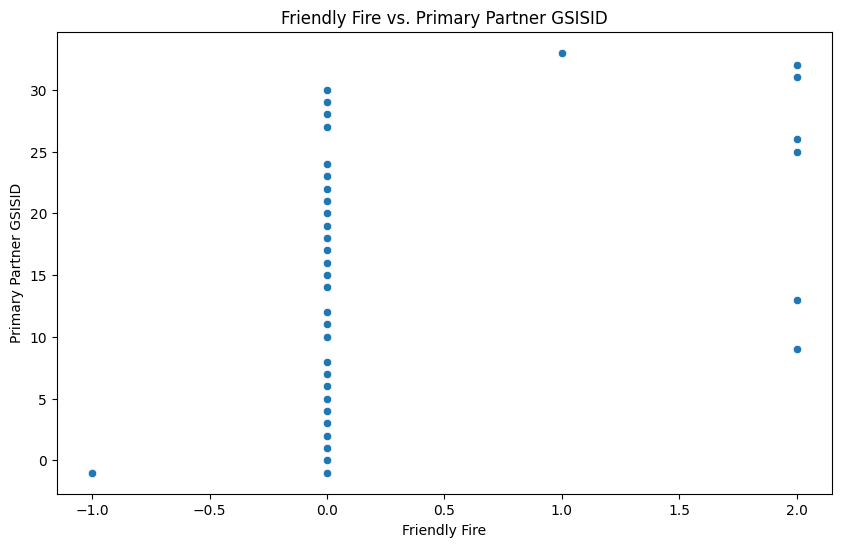

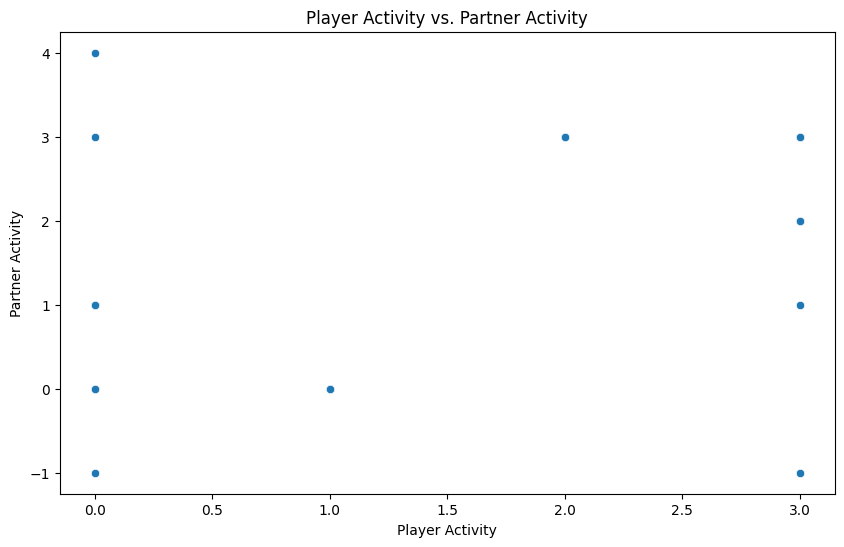

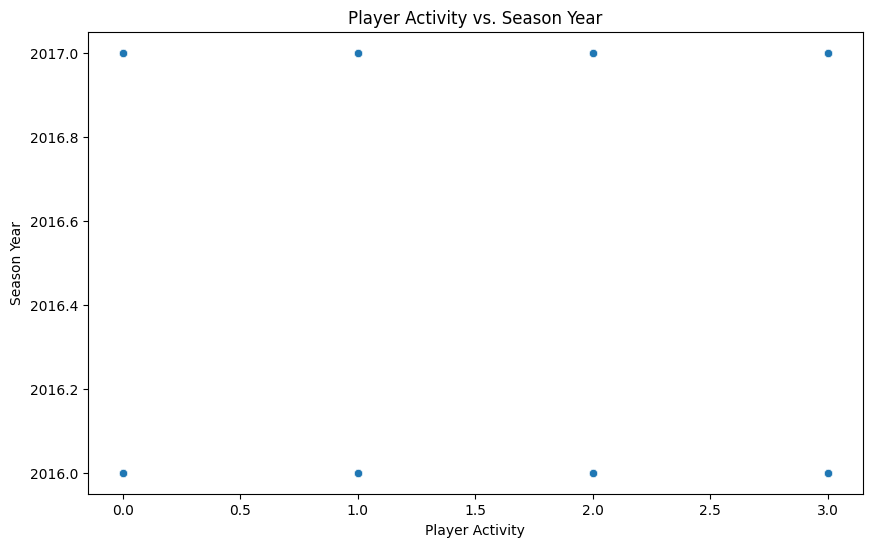

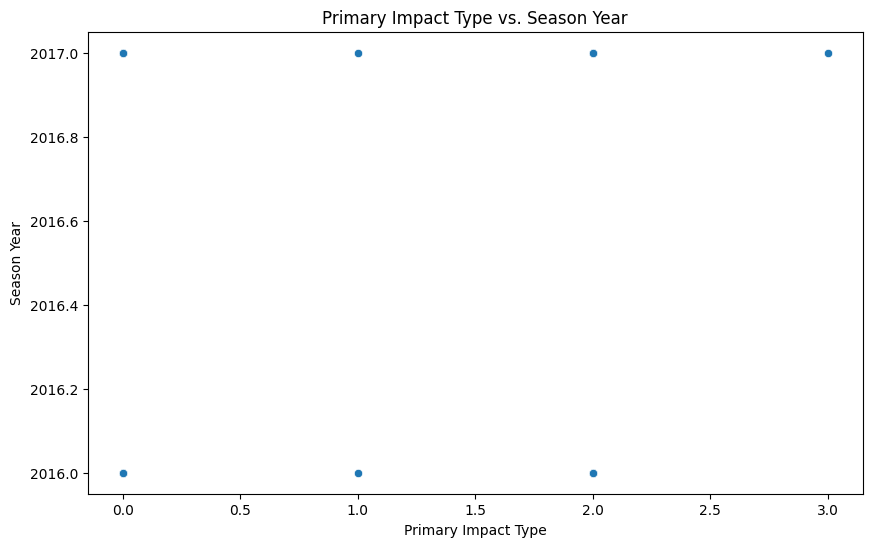

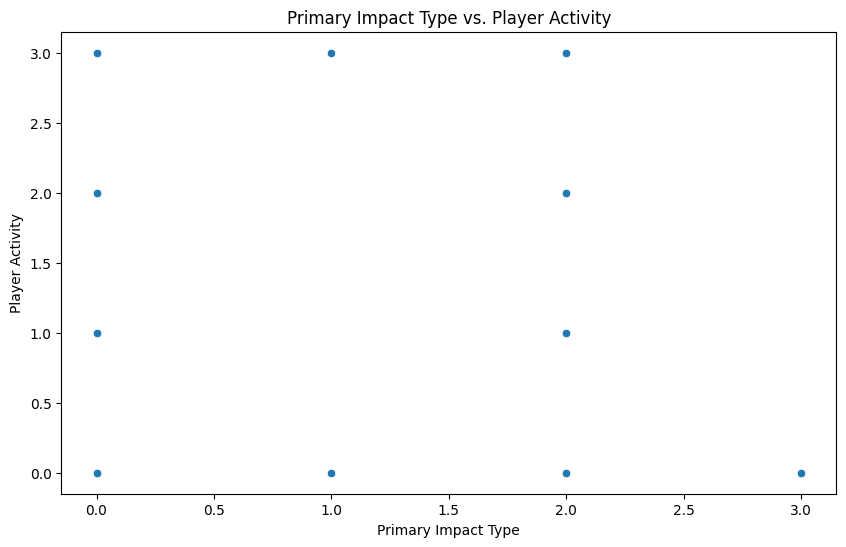

In [20]:
#Draw scatterplots, especially when the correlation is large

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Season Year vs. GameKey
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Season_Year', y='GameKey', data=df)
plt.title('Season Year vs. GameKey')
plt.xlabel('Season Year')
plt.ylabel('GameKey')
plt.show()

# Friendly Fire vs. Primary Partner GSISID
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Friendly_Fire', y='Primary_Partner_GSISID', data=df)
plt.title('Friendly Fire vs. Primary Partner GSISID')
plt.xlabel('Friendly Fire')
plt.ylabel('Primary Partner GSISID')
plt.show()

# Player Activity vs. Partner Activity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Player_Activity_Derived', y='Primary_Partner_Activity_Derived', data=df)
plt.title('Player Activity vs. Partner Activity')
plt.xlabel('Player Activity')
plt.ylabel('Partner Activity')
plt.show()

# Player Activity vs. Season Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Player_Activity_Derived', y='Season_Year', data=df)
plt.title('Player Activity vs. Season Year')
plt.xlabel('Player Activity')
plt.ylabel('Season Year')
plt.show()

# Primary Impact Type vs. Season Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Primary_Impact_Type', y='Season_Year', data=df)
plt.title('Primary Impact Type vs. Season Year')
plt.xlabel('Primary Impact Type')
plt.ylabel('Season Year')
plt.show()

#  Primary Impact Type vs. Player Activity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Primary_Impact_Type', y='Player_Activity_Derived', data=df)
plt.title('Primary Impact Type vs. Player Activity')
plt.xlabel('Primary Impact Type')
plt.ylabel('Player Activity')
plt.show()


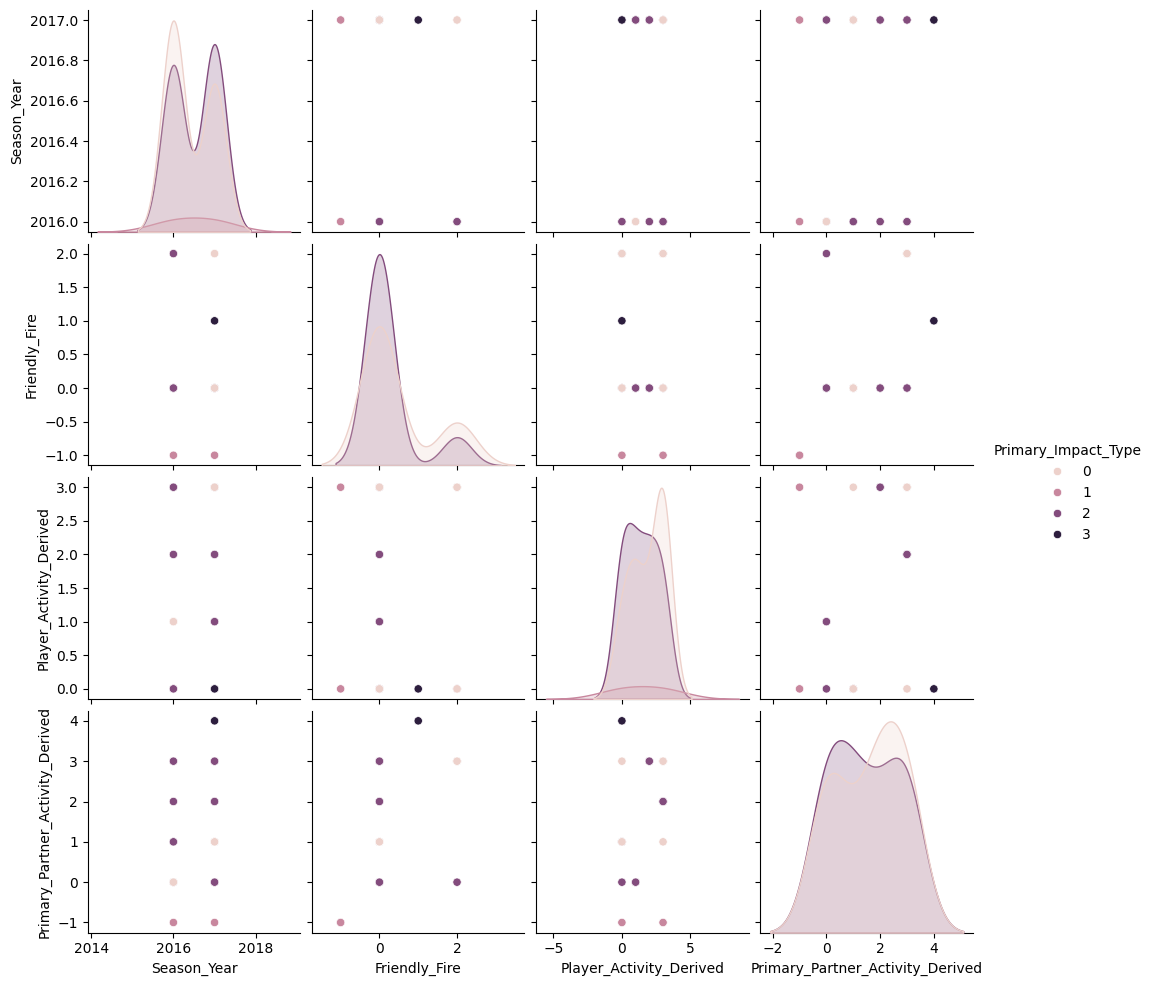

In [21]:
#Draw pairplots

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


columns_of_interest = ['Season_Year', 'Friendly_Fire', 'Player_Activity_Derived', 
                       'Primary_Partner_Activity_Derived', 'Primary_Impact_Type']

sns.pairplot(df[columns_of_interest], hue='Primary_Impact_Type', diag_kind='kde')

plt.show()


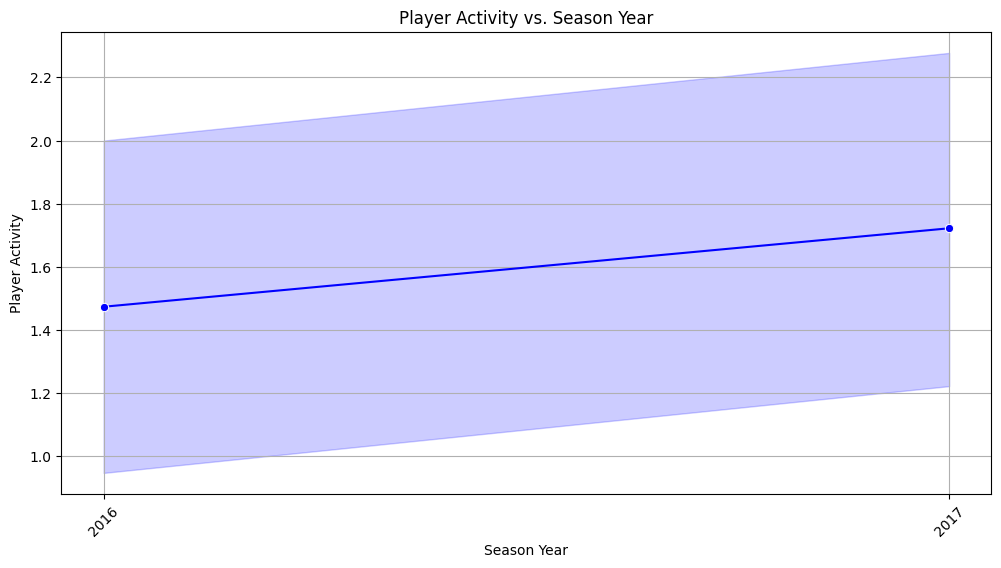

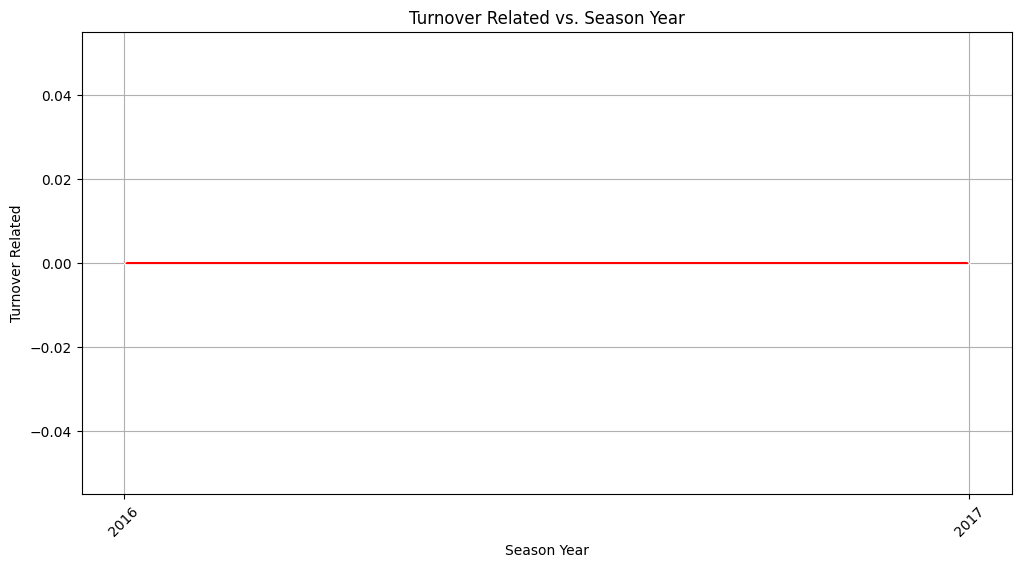

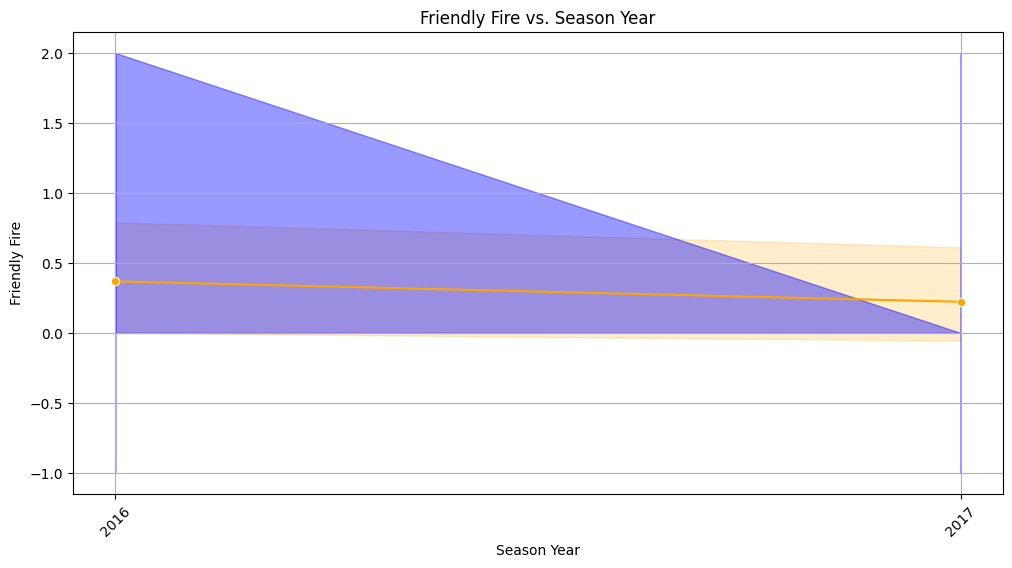

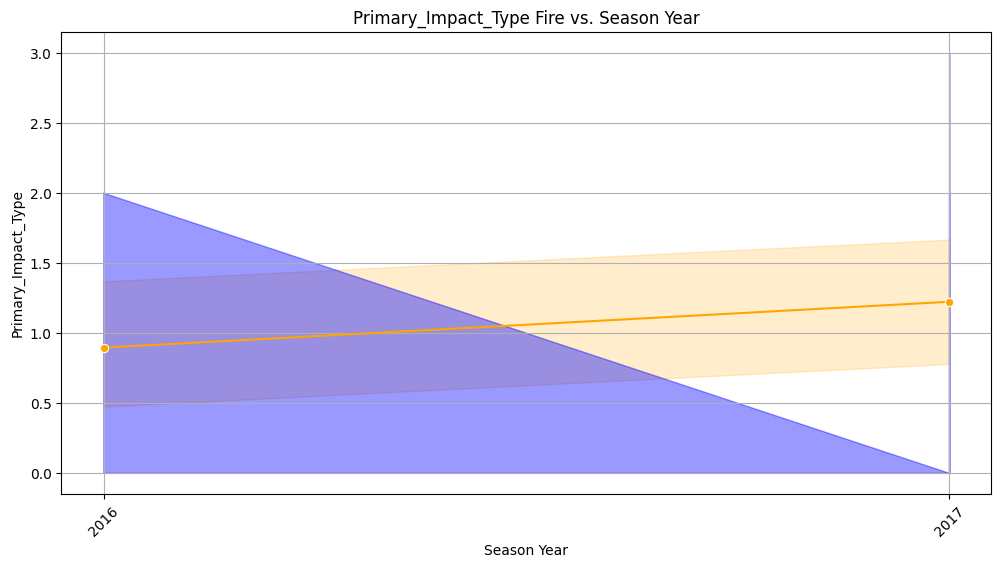

In [24]:
#Draw line graphs and/or area graphs when there is date or time data together with numerical data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Season_Year'] = df['Season_Year'].astype(str)

# Player Activity vs. Season Year 
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Season_Year', y='Player_Activity_Derived', marker='o', color='b')
plt.title('Player Activity vs. Season Year')
plt.xlabel('Season Year')
plt.ylabel('Player Activity')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Turnover Related vs. Season Year 
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Season_Year', y='Turnover_Related', marker='x', color='r')
plt.title('Turnover Related vs. Season Year')
plt.xlabel('Season Year')
plt.ylabel('Turnover Related')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Friendly Fire vs. Season Year 
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Season_Year', y='Friendly_Fire', marker='o', color='orange')
plt.fill_between(df['Season_Year'], df['Friendly_Fire'], color='blue', alpha=0.4)  
plt.title('Friendly Fire vs. Season Year')
plt.xlabel('Season Year')
plt.ylabel('Friendly Fire')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# Impact Type vs. Season Year 
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Season_Year', y='Primary_Impact_Type', marker='o', color='orange')
plt.fill_between(df['Season_Year'], df['Primary_Impact_Type'], color='blue', alpha=0.4)  
plt.title('Primary_Impact_Type Fire vs. Season Year')
plt.xlabel('Season Year')
plt.ylabel('Primary_Impact_Type')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!



- Do you see any outliers?  (Data points that are far from the rest of the data).



- Are any data items highly correlated with each other, suggesting that they are redundant?



- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?



- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)



# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

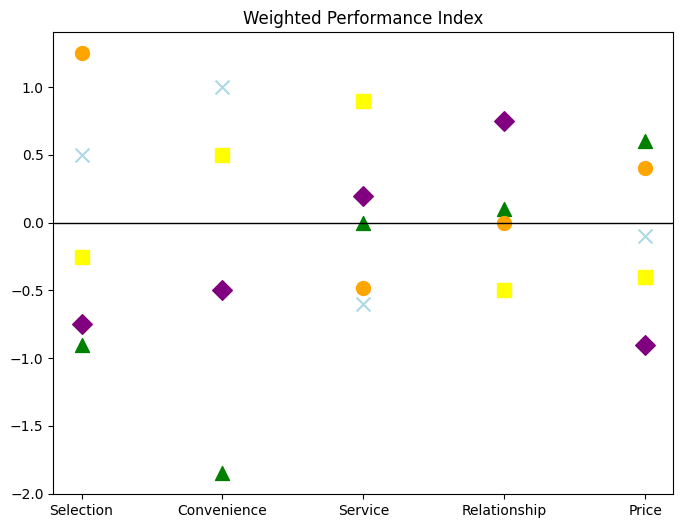

In [23]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['Selection', 'Convenience', 'Service', 'Relationship', 'Price']
y_values = [1.5, 1, 0, -0.5, -1.0, -1.5, -0.5]


y_values = {
    'Selection': [1.25, 0.5, -0.25, -0.75, -0.9],
    'Convenience': [1.0, 0.5, -0.5, -0.6 -1.25],
    'Service': [0.9, 0.2, 0, -0.48, -0.6],
    'Relationship': [0.75, 0.1, 0, -0.5, -0.5],
    'Price': [0.6, 0.4, -0.1, -0.4, -0.9]
}

shapes = ['o', 'x', 's', 'D', '^']  
colors = ['orange', 'lightblue', 'yellow', 'purple', 'green']
plt.figure(figsize=(8, 6))

for i, category in enumerate(categories):
    starting_shape = shapes[i % len(shapes)]  
    starting_color = colors[i % len(colors)]   
    
    for j, y in enumerate(y_values[category]):
        shape_index = (j + i) % len(shapes)  
        color_index = (j + i) % len(colors)  
        
        plt.scatter(category, y, color=colors[color_index], marker=shapes[shape_index], s=100)


plt.axhline(0, color='black',linewidth=1)

plt.title("Weighted Performance Index")
plt.grid(False)
plt.show()

